# CA1 - Pattern Recognition Systems
### Authors - Akshay Sachdeva, Aniket Mohan Arasanipalai

In [1]:
#importing required pacakges and cleaning data

import pandas as pd 
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

data = pd.read_csv('Churn_Final_datasett.csv')

data = data.drop(['customerID', 'Partner', 'StreamingTV', 'StreamingMovies','contact'], axis= 1)
data.MultipleLines = [(str(x).split(' ')[0]) for x in list(data.MultipleLines)]
data.OnlineSecurity = [(str(x).split(' ')[0]) for x in list(data.OnlineSecurity)]
data.OnlineBackup = [(str(x).split(' ')[0]) for x in list(data.OnlineBackup)]
data.DeviceProtection = [(str(x).split(' ')[0]) for x in list(data.DeviceProtection)]
data.TechSupport = [(str(x).split(' ')[0]) for x in list(data.TechSupport)]

#Converting Coverting data to Numerical 
categorical_data = data.iloc[:, [0,2,4,5,6,7,8,9,10,11,12]].values
categorical_data = pd.DataFrame(categorical_data)
X_dict = categorical_data.to_dict(orient='records')
from sklearn.feature_extraction import DictVectorizer
dv_X = DictVectorizer(sparse=False)
# apply dv_X on X_dict
X_encoded = dv_X.fit_transform(X_dict)
# show X_encoded
X_encoded = pd.DataFrame(X_encoded)
X_encoded = X_encoded.drop([1,3,5,7,8,12,14,15,18,19,23], axis= 1)
#Renaming 
X_encoded.rename(columns={0: 'Gender',2:'PaperLess Billing',4: 'Dependents', 6: 'Phone Services', 9: 'MultipleLines',10:'DSL',11:'Fiber Optic',13:'OnlineSecurity',16:'OnlineBackup',17:'DeviceProtection',20:'Tech Support',21:'month-to-month',22:'OneYear'}, inplace=True)
#(0,1->Gender,2,3->PaperLess Billing,4,5->Dependents ,6,7->Phone Services,8,9->MultipleLines, 10,11,12->Internet Service,#13,14->Online Security, 15,16->Online Backup,17,18-> DeviceProtection,19,20-> Tech Support,21,22,23->Contract  )

#Converting Other Categorical to Numerical
categorical_data_2 = data.iloc[:, [13,16,20,21,22,23]].values
categorical_data_2 = pd.DataFrame(categorical_data_2)
X_dict1 = categorical_data_2.to_dict(orient='records')
from sklearn.feature_extraction import DictVectorizer
dv_X1 = DictVectorizer(sparse=False)
# apply dv_X on X_dict
X_encoded_2 = dv_X1.fit_transform(X_dict1)
# show X_encoded
X_encoded_2 = pd.DataFrame(X_encoded_2)
X_encoded_2 = X_encoded_2.drop([1,4,11,14,16,17], axis= 1)
X_encoded_2.rename(columns={0: 'BankTransfer',2:'ElectronicCheck',3: 'MailedCheck',5:'Germany', 6: 'Spain',7:'Admin',8:'Blue-Collar',9: 'Business',10:'Management',12:'Primary',13:'secondary',15:'Housing',18:'Loan'}, inplace=True)
#(0,1,2,3->Electronic Check, 4,5,6 ->Country,7,8,9,10,11->Job ,12,13,14 ->Tertiary,15,16->Housing,17,18->Loan  )

#Extracting Numerical Data
numerical_data = data.iloc[:, [1,3,14,15,17,18,19,24]].values
numerical_data = pd.DataFrame(numerical_data)
numerical_data.rename(columns={0: 'SeniorCitizen',1:'tenure',2: 'Monthly Charges', 3: 'TotalCharges', 4: 'CreditScore',5:'NumOfProducts',6:'Has Card',7:'IsActive'}, inplace=True)

#Concatenating all the converted Numerical Data 
df = pd.concat([X_encoded, X_encoded_2], axis = 1)
#Concatenating all the data together
datas = pd.concat([df, numerical_data], axis=1)

#Converting Object type to Float
datas['SeniorCitizen'] = datas['SeniorCitizen'].astype(float)
datas['tenure'] = datas['tenure'].astype(float)
datas['Monthly Charges'] = datas['Monthly Charges'].astype(float)
#datas['TotalCharges'] = datas['TotalCharges'].astype(float)
datas['CreditScore'] = datas['CreditScore'].astype(float)
datas['NumOfProducts'] = datas['NumOfProducts'].astype(float)
datas['Has Card'] = datas['Has Card'].astype(float)
datas['IsActive'] = datas['IsActive'].astype(float)
#Removing Total Charges
datas = datas.drop(['TotalCharges'], axis= 1)


from sklearn.preprocessing import LabelEncoder
labelencoder_y = LabelEncoder()
y = data.iloc[:, -1].values
y = pd.DataFrame(y)
y[0] = labelencoder_y.fit_transform(y[0])


In [2]:
#importing train_test_split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(datas,y,test_size=1/3,random_state=42, stratify=y)

In [3]:
#checking rows and columns of training data
X_train.shape

(4695, 33)

In [4]:
#checking rows and columns of test data
X_test.shape

(2348, 33)

In [5]:
#Normalizing data
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test) 

## Logistic Regression

In [6]:
#Implementing Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=0.02).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

E:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training set score: 0.803
Test set score: 0.800


In [7]:
logreg.intercept_.T

array([-1.36426377])

In [8]:
logreg.coef_.T

array([[-0.00841463],
       [-0.19133914],
       [ 0.11110265],
       [ 0.19783618],
       [ 0.09527349],
       [ 0.14217974],
       [ 0.35304306],
       [ 0.18956329],
       [-0.10626031],
       [ 0.03870291],
       [-0.17247668],
       [ 0.44655324],
       [ 0.06500687],
       [-0.01184673],
       [ 0.20051804],
       [ 0.04411896],
       [-0.00320305],
       [ 0.00457128],
       [ 0.03238644],
       [-0.03554662],
       [-0.0630949 ],
       [-0.03015726],
       [-0.01153337],
       [-0.02423547],
       [-0.02511976],
       [ 0.02264822],
       [ 0.05995074],
       [-0.62614895],
       [ 0.48504999],
       [-0.03867935],
       [-0.01224491],
       [-0.041181  ],
       [ 0.02106647]])

In [9]:
#Obtaining Confusion Matrix
from sklearn.metrics import classification_report, confusion_matrix  
y_pred = logreg.predict(X_test)
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred)) 
print(mean_squared_error(y_test,y_pred))

[[1544  181]
 [ 289  334]]
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1725
           1       0.65      0.54      0.59       623

   micro avg       0.80      0.80      0.80      2348
   macro avg       0.75      0.72      0.73      2348
weighted avg       0.79      0.80      0.79      2348

0.20017035775127767


Accuracy= 0.7998296422487223


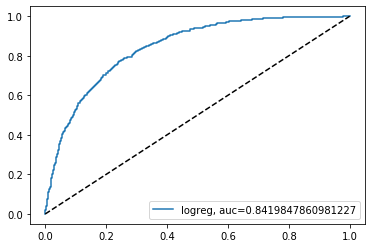

In [20]:
#Plotting roc and getting accuracy
from sklearn import metrics


print("Accuracy=", metrics.accuracy_score(y_test, y_pred))
 
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.plot(fpr,tpr,label="logreg, auc="+str(auc))
plt.plot([0,1],[0,1],'k--')
plt.legend(loc=4)
plt.show()

In [11]:
import matplotlib.pyplot as plt
import scikitplot as skplt
y_pred_probas = logreg.predict_proba(X_test)

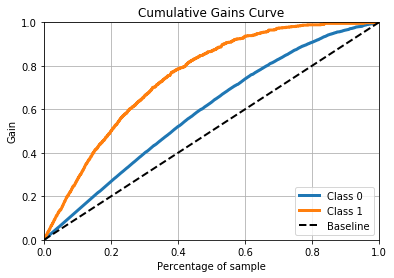

In [12]:
#Plot gain curve
skplt.metrics.plot_cumulative_gain(y_test, y_pred_probas)
plt.show()

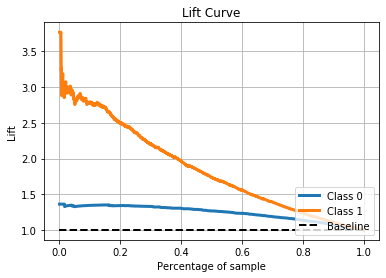

In [13]:
# Plot lift curve
skplt.metrics.plot_lift_curve(y_test, y_pred_probas)
plt.show()

## KNN

In [14]:
#Implementation of KNN

from sklearn.neighbors import KNeighborsClassifier

test_scores = []
train_scores = []

for i in range(1,25):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()
E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()
E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()
E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), f

In [15]:
## score that comes from testing on the same datapoints that were used for training
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

Max train score 100.0 % and k = [1]


In [16]:
#Obtaining test scores
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max test score 78.02385008517888 % and k = [20]


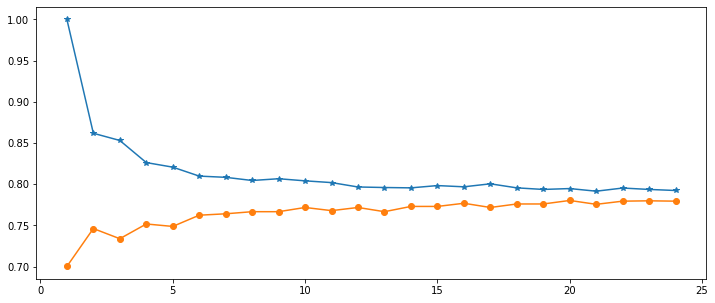

In [17]:
#Plotting train and test scores to find value of k
plt.figure(figsize=(12,5))
plt.plot(range(1,25),train_scores,marker='*',label='Train Score')
plt.plot(range(1,25),test_scores,marker='o',label='Test Score')

In [26]:
#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(20)

knn.fit(X_train,y_train)

knn.score(X_test,y_test)

E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


0.7802385008517888

In [27]:
#Plotting roc
from sklearn.metrics import roc_curve
y_pred_proba = knn.predict_proba(X_test)[:,1]
fprc, tprc, thresholds = roc_curve(y_test, y_pred_proba)


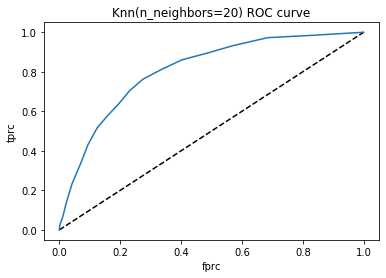

In [28]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fprc,tprc, label='Knn')
plt.xlabel('fprc')
plt.ylabel('tprc')
plt.title('Knn(n_neighbors=20) ROC curve')
plt.show()

0.8092939725963664


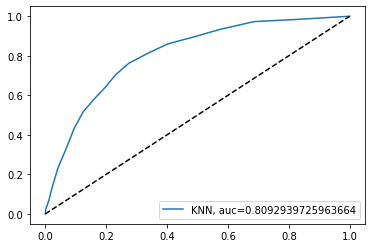

0.20118494485262023


In [39]:
#Area under ROC curve
from sklearn.metrics import roc_auc_score
auc1 = roc_auc_score(y_test,y_pred_proba)
print(auc1)

plt.plot(fprc,tprc,label="KNN, auc="+str(auc1))
plt.plot([0,1],[0,1],'k--')
plt.legend(loc=4)
plt.show()

print(mean_squared_error(y_test,y_pred_proba))

## Naive Bayes

In [30]:
#Importing packages related to Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix

In [31]:
# Initiating the Gaussian Classifier
mod = GaussianNB()

In [32]:
# Training your model 
mod.fit(X_train, y_train)

E:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None, var_smoothing=1e-09)

In [33]:
# Predicting Outcome 
predicted = mod.predict(X_test)

In [34]:
mod.score(X_test,y_test)

0.7606473594548552

In [35]:
# Confusion Matrix
y_pred = mod.predict(X_test)
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred)) 
print(mean_squared_error(y_test,y_pred))

[[1354  371]
 [ 191  432]]
              precision    recall  f1-score   support

           0       0.88      0.78      0.83      1725
           1       0.54      0.69      0.61       623

   micro avg       0.76      0.76      0.76      2348
   macro avg       0.71      0.74      0.72      2348
weighted avg       0.79      0.76      0.77      2348

0.2393526405451448


Accuracy= 0.7606473594548552


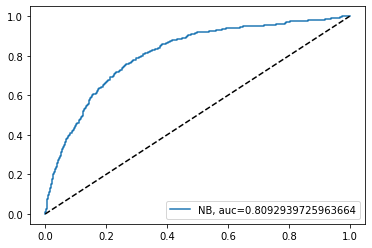

In [36]:
#Obtaining Accuracy and printing roc
from sklearn import metrics


print("Accuracy=", metrics.accuracy_score(y_test, y_pred))
 
y_pred_proba = mod.predict_proba(X_test)[::,1]
fprk, tprk, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc2 = metrics.roc_auc_score(y_test, y_pred_proba)

plt.plot(fprk,tprk,label="NB, auc="+str(auc2))
plt.plot([0,1],[0,1],'k--')
plt.legend(loc=4)
plt.show()

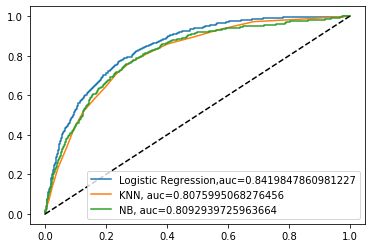

In [37]:
#Comparing auc obtained from 3 methods
from sklearn import metrics

plt.plot(fpr,tpr, label="Logistic Regression,auc="+str(auc))
plt.plot(fprc,tprc,label="KNN, auc="+str(auc1))
plt.plot(fprk,tprk,label="NB, auc="+str(auc2))
plt.plot([0,1],[0,1],'k--')
plt.legend(loc=4)
plt.show()